# This Notebook is Model Testing for Section instances of Classification Codes

In [1]:
# Import all necessary packages

import ast
import nltk
import string
import numpy as np
import pandas as pd

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, hamming_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from matplotlib import pyplot as plt

from prettytable import PrettyTable

2023-07-27 11:10:10.890420: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# All Data

The subsequent section will test the performance of the following models on the whole dataset:

- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Deep Nerual Networks


In [3]:
# Load the data
df = pd.read_csv('Data_Preprocessed_Section.csv')
df['Classification Codes'] = df['Classification Codes'].apply(ast.literal_eval)
df.head()

,Context,Classification Codes
0,processor compil system receiv predict model r...,[G]
1,imag sens devic imag sens devic includ substra...,[H]
2,antigen specif immunotherapi covid19 fusion pr...,"[A, C]"
3,secur deescal data access concept technolog di...,[G]
4,system method secur cloudbas physiolog data pr...,"[G, A]"


In [4]:
# Encode "Classification Codes" column as multi-labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Classification Codes'])

# Split the data into training(80%) and testing sets(20%)
X_train, X_test, y_train, y_test = train_test_split(df['Context'], y, test_size=0.2, random_state=42)

In [5]:
# Apply feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Logistic Regression 

In [6]:
logistic_regression = LogisticRegression()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(logistic_regression)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.5594138260592545
Hamming Loss: 0.07199745141764893


## Random Forest Classifier 


In [7]:
classifier = RandomForestClassifier()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.6285441223319529
Hamming Loss: 0.06056865243708187


## Support Vector Machine  (One vs Rest)


In [8]:
svm_classifier = SVC(kernel='linear')

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(svm_classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.5148136349155782
Hamming Loss: 0.08159445683338643


## Deep Neural Networks 

In [9]:
# Convert sparse matrices to dense NumPy arrays
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Build basic deep neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_dense.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Use sigmoid activation for multi-label classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Make predictions
y_pred_proba = model.predict(X_test_dense)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
hamming_loss_value = hamming_loss(y_test, y_pred)

2023-07-27 10:48:42.203851: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
314/314 [==============================] - 10s 29ms/step - loss: 0.1738 - accuracy: 0.7930 - val_loss: 0.1522 - val_accuracy: 0.8068
Epoch 2/10
314/314 [==============================] - 8s 27ms/step - loss: 0.0855 - accuracy: 0.8363 - val_loss: 0.1704 - val_accuracy: 0.8061
Epoch 3/10
314/314 [==============================] - 8s 26ms/step - loss: 0.0446 - accuracy: 0.8389 - val_loss: 0.1957 - val_accuracy: 0.7937
Epoch 4/10
314/314 [==============================] - 8s 27ms/step - loss: 0.0234 - accuracy: 0.8416 - val_loss: 0.2363 - val_accuracy: 0.7873
Epoch 5/10
314/314 [==============================] - 9s 27ms/step - loss: 0.0122 - accuracy: 0.8400 - val_loss: 0.2721 - val_accuracy: 0.8096
Epoch 6/10
314/314 [==============================] - 8s 27ms/step - loss: 0.0088 - accuracy: 0.8376 - val_loss: 0.2937 - val_accuracy: 0.8021
Epoch 7/10
314/314 [==============================] - 9s 27ms/step - loss: 0.0067 - accuracy: 0.8350 - val_loss: 0.3332 - val_accuracy: 0.803

In [10]:
# Get accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the accuracy and validation accuracy for each epoch
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch + 1} - Accuracy: {accuracy[epoch]:.4f}, Validation Accuracy: {val_accuracy[epoch]:.4f}")
    
# Print hamming loss
print("\nHamming Loss:", hamming_loss_value)

Epoch 1 - Accuracy: 0.7930, Validation Accuracy: 0.8068
Epoch 2 - Accuracy: 0.8363, Validation Accuracy: 0.8061
Epoch 3 - Accuracy: 0.8389, Validation Accuracy: 0.7937
Epoch 4 - Accuracy: 0.8416, Validation Accuracy: 0.7873
Epoch 5 - Accuracy: 0.8400, Validation Accuracy: 0.8096
Epoch 6 - Accuracy: 0.8376, Validation Accuracy: 0.8021
Epoch 7 - Accuracy: 0.8350, Validation Accuracy: 0.8033
Epoch 8 - Accuracy: 0.8280, Validation Accuracy: 0.7762
Epoch 9 - Accuracy: 0.8232, Validation Accuracy: 0.7997
Epoch 10 - Accuracy: 0.8350, Validation Accuracy: 0.7885

Hamming Loss: 0.06431188276521185


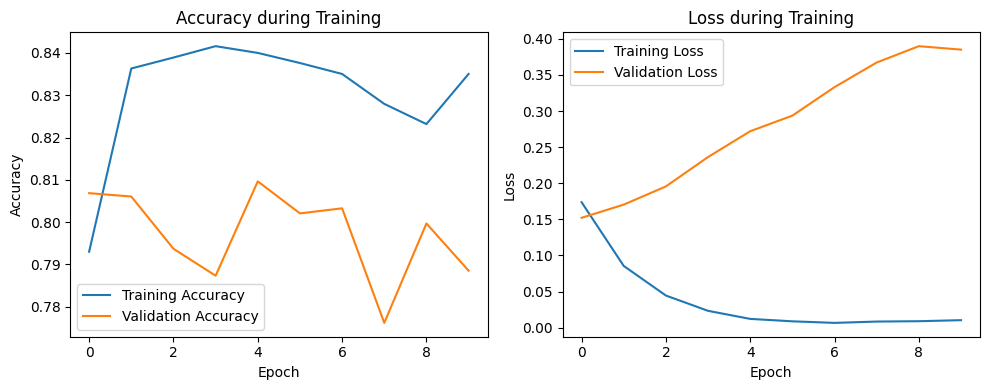

In [11]:
# Plot the training history
plt.figure(figsize=(10, 4))

# Accuracy/validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()

# Loss/validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()

plt.tight_layout()
plt.show()

# Top 18 Codes

The subsequent section will utalise a subset of the whole data. This subset only contains the set of top 18 codes by frequency these codes are (removed repeated codes):

- A   
- G
- H

The following models will be tested to get the accuracy and hamming loss:

- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Deep Nerual Networks

In [3]:
# Load the data for top 18 codes
df = pd.read_csv('Data_Preprocessed_Section_Top18.csv')
df['Classification Codes'] = df['Classification Codes'].apply(ast.literal_eval)
df.head()

,Context,Classification Codes
0,processor compil system receiv predict model r...,[G]
1,imag sens devic imag sens devic includ substra...,[H]
2,antigen specif immunotherapi covid19 fusion pr...,[A]
3,secur deescal data access concept technolog di...,[G]
4,system method secur cloudbas physiolog data pr...,"[G, A]"


In [4]:
# Encode the "Classification Codes" column as multi-labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Classification Codes'])

# Split the data into training(80%) and testing sets(20%)
X_train, X_test, y_train, y_test = train_test_split(df['Context'], y, test_size=0.2, random_state=42)

In [5]:
# Apply feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

##  Logistic Regression

In [15]:
logistic_regression = LogisticRegression()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(logistic_regression)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.6413704771053474
Hamming Loss: 0.14558650869890064


## Random Forest 

In [16]:
classifier = RandomForestClassifier()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.6990073647134166
Hamming Loss: 0.1212509339310492


## Support Vector Machine  (One vs Rest)


In [6]:
svm_classifier = SVC(kernel='linear')

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(svm_classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.5933397374319564
Hamming Loss: 0.16853452876507632


## Deep Neural Networks 

In [7]:
# Convert sparse matrices to dense NumPy arrays
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Build deep neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_dense.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Use sigmoid activation for multi-label classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Make predictions
y_pred_proba = model.predict(X_test_dense)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
hamming_loss_value = hamming_loss(y_test, y_pred)

2023-07-27 11:16:08.771648: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
313/313 [==============================] - 11s 33ms/step - loss: 0.3133 - accuracy: 0.8274 - val_loss: 0.2812 - val_accuracy: 0.8571
Epoch 2/10
313/313 [==============================] - 8s 26ms/step - loss: 0.1532 - accuracy: 0.8733 - val_loss: 0.3010 - val_accuracy: 0.8463
Epoch 3/10
313/313 [==============================] - 9s 27ms/step - loss: 0.0747 - accuracy: 0.8839 - val_loss: 0.3858 - val_accuracy: 0.8463
Epoch 4/10
313/313 [==============================] - 7s 24ms/step - loss: 0.0379 - accuracy: 0.8818 - val_loss: 0.4764 - val_accuracy: 0.8451
Epoch 5/10
313/313 [==============================] - 7s 23ms/step - loss: 0.0208 - accuracy: 0.8797 - val_loss: 0.5742 - val_accuracy: 0.8379
Epoch 6/10
313/313 [==============================] - 7s 22ms/step - loss: 0.0156 - accuracy: 0.8807 - val_loss: 0.6425 - val_accuracy: 0.8575
Epoch 7/10
313/313 [==============================] - 8s 24ms/step - loss: 0.0087 - accuracy: 0.8780 - val_loss: 0.7151 - val_accuracy: 0.848

In [8]:
# Get accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the accuracy and validation accuracy for each epoch
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch + 1} - Accuracy: {accuracy[epoch]:.4f}, Validation Accuracy: {val_accuracy[epoch]:.4f}")
    
# Print hamming loss
print("\nHamming Loss:", hamming_loss_value)

Epoch 1 - Accuracy: 0.8274, Validation Accuracy: 0.8571
Epoch 2 - Accuracy: 0.8733, Validation Accuracy: 0.8463
Epoch 3 - Accuracy: 0.8839, Validation Accuracy: 0.8463
Epoch 4 - Accuracy: 0.8818, Validation Accuracy: 0.8451
Epoch 5 - Accuracy: 0.8797, Validation Accuracy: 0.8379
Epoch 6 - Accuracy: 0.8807, Validation Accuracy: 0.8575
Epoch 7 - Accuracy: 0.8780, Validation Accuracy: 0.8487
Epoch 8 - Accuracy: 0.8680, Validation Accuracy: 0.8447
Epoch 9 - Accuracy: 0.8742, Validation Accuracy: 0.8415
Epoch 10 - Accuracy: 0.8754, Validation Accuracy: 0.8435

Hamming Loss: 0.12381257338029672


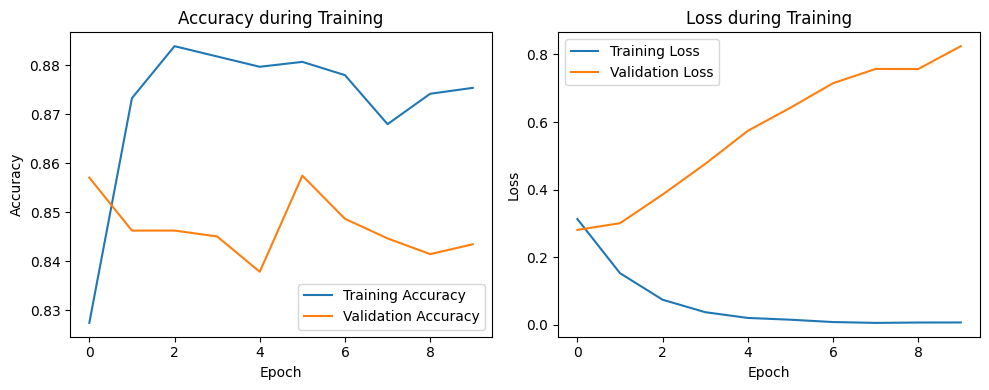

In [9]:
# Plot the training history
plt.figure(figsize=(10, 4))

# Accuracy/validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()

# Loss/validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()

plt.tight_layout()
plt.show()

# Selected 7 Codes

The subsequent section will utalise a smaller subset of the whole data. This subset only contains the set of selected 7 codes by Beyond Blood, these codes are (removed repeated codes):

- A    
- G


The following models will be tested to get the accuracy and hamming loss:

- Logistic Regression
- Random Forest Classifier
- Support Vector Machine
- Deep Nerual Networks

In [10]:
# Load the data for selected 7 codes by Beyond Blood
df = pd.read_csv('Data_Preprocessed_Section_Selected7.csv')
df['Classification Codes'] = df['Classification Codes'].apply(ast.literal_eval)
df.head()

,Context,Classification Codes
0,processor compil system receiv predict model r...,[G]
1,antigen specif immunotherapi covid19 fusion pr...,[A]
2,secur deescal data access concept technolog di...,[G]
3,system method secur cloudbas physiolog data pr...,"[G, A]"
4,collim detector base medic imag system medic i...,"[G, A]"


In [11]:
# Encode the "Classification Codes" column as multi-labels
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(df['Classification Codes'])

# Split the data into training(80%) and testing sets(20%)
X_train, X_test, y_train, y_test = train_test_split(df['Context'], y, test_size=0.2, random_state=42)

In [12]:
# Apply feature extraction using TfidfVectorizer
vectorizer = TfidfVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

## Logistic Regression 

In [13]:
logistic_regression = LogisticRegression()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(logistic_regression)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.7347826086956522
Hamming Loss: 0.1423913043478261


## Random Forest 

In [14]:
classifier = RandomForestClassifier()

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.7579710144927536
Hamming Loss: 0.13152173913043477


## Support Vector Machine  (One vs Rest)


In [15]:
svm_classifier = SVC(kernel='linear')

# Use MultiOutputClassifier for multi-label classification
multi_label_classifier = MultiOutputClassifier(svm_classifier)

# Train the model
multi_label_classifier.fit(X_train_vectorized, y_train)

# Make predictions
y_pred = multi_label_classifier.predict(X_test_vectorized)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
hamming_loss_value = hamming_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("Hamming Loss:", hamming_loss_value)

Accuracy: 0.7152173913043478
Hamming Loss: 0.1559782608695652


## Deep Neural Networks

In [16]:
# Convert sparse matrices to dense NumPy arrays
X_train_dense = X_train_vectorized.toarray()
X_test_dense = X_test_vectorized.toarray()

# Build the deep neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(X_train_dense.shape[1],)))
model.add(Dense(32, activation='relu'))
model.add(Dense(y.shape[1], activation='sigmoid'))  # Use sigmoid activation for multi-label classification

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_dense, y_train, batch_size=32, epochs=10, validation_split=0.2)

# Make predictions
y_pred_proba = model.predict(X_test_dense)
y_pred = (y_pred_proba > 0.5).astype(int)

# Evaluate the model
hamming_loss_value = hamming_loss(y_test, y_pred)

Epoch 1/10
276/276 [==============================] - 9s 32ms/step - loss: 0.3005 - accuracy: 0.8525 - val_loss: 0.2589 - val_accuracy: 0.8650
Epoch 2/10
276/276 [==============================] - 6s 23ms/step - loss: 0.1421 - accuracy: 0.8963 - val_loss: 0.3192 - val_accuracy: 0.8705
Epoch 3/10
276/276 [==============================] - 7s 26ms/step - loss: 0.0630 - accuracy: 0.9042 - val_loss: 0.3887 - val_accuracy: 0.8736
Epoch 4/10
276/276 [==============================] - 7s 24ms/step - loss: 0.0262 - accuracy: 0.9006 - val_loss: 0.5166 - val_accuracy: 0.8650
Epoch 5/10
276/276 [==============================] - 7s 27ms/step - loss: 0.0107 - accuracy: 0.8994 - val_loss: 0.5903 - val_accuracy: 0.8601
Epoch 6/10
276/276 [==============================] - 6s 22ms/step - loss: 0.0133 - accuracy: 0.8896 - val_loss: 0.6555 - val_accuracy: 0.8510
Epoch 7/10
276/276 [==============================] - 6s 23ms/step - loss: 0.0082 - accuracy: 0.8932 - val_loss: 0.7238 - val_accuracy: 0.8650

In [17]:
# Get accuracy and validation accuracy
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Print the accuracy and validation accuracy for each epoch
for epoch in range(len(accuracy)):
    print(f"Epoch {epoch + 1} - Accuracy: {accuracy[epoch]:.4f}, Validation Accuracy: {val_accuracy[epoch]:.4f}")
    
# Print hamming loss
print("\nHamming Loss:", hamming_loss_value)

Epoch 1 - Accuracy: 0.8525, Validation Accuracy: 0.8650
Epoch 2 - Accuracy: 0.8963, Validation Accuracy: 0.8705
Epoch 3 - Accuracy: 0.9042, Validation Accuracy: 0.8736
Epoch 4 - Accuracy: 0.9006, Validation Accuracy: 0.8650
Epoch 5 - Accuracy: 0.8994, Validation Accuracy: 0.8601
Epoch 6 - Accuracy: 0.8896, Validation Accuracy: 0.8510
Epoch 7 - Accuracy: 0.8932, Validation Accuracy: 0.8650
Epoch 8 - Accuracy: 0.8924, Validation Accuracy: 0.8424
Epoch 9 - Accuracy: 0.8902, Validation Accuracy: 0.8573
Epoch 10 - Accuracy: 0.8893, Validation Accuracy: 0.8668

Hamming Loss: 0.12536231884057972


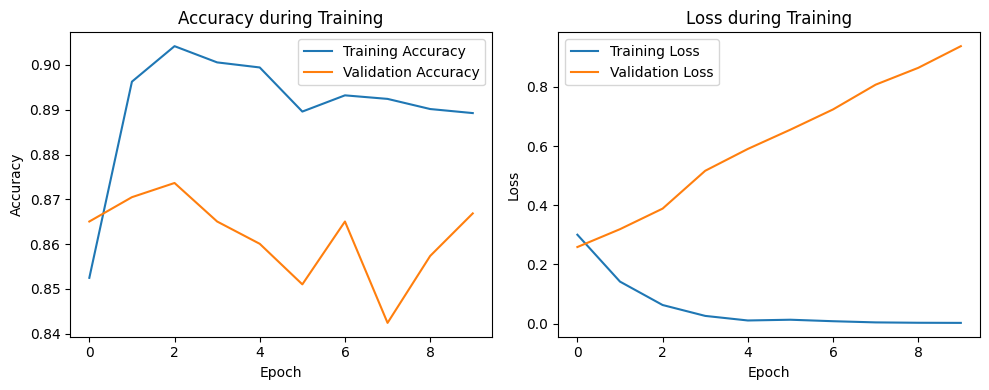

In [18]:
# Plot the training history
plt.figure(figsize=(10, 4))

# Accuracy/validation accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy during Training')
plt.legend()

# Loss/validation loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss during Training')
plt.legend()

plt.tight_layout()
plt.show()

# Results
This section presents all results from the model into a table format for ease of visualisation

In [19]:
def results_table(data):
    table = PrettyTable()
    
    # Define column headers
    table.field_names = ["Model", "Accuracy", "Hamming Loss"]
    
    # Add data
    for row in data:
        table.add_row(row)
        
    # Align data
    table.align["Model"] = "l"
    table.align["Accuracy"] = "r"
    table.align["Hamming Loss"] = "r"
    table.float_format = ".4"

    print(table)

In [20]:
# Data for the table
data_all = [
    ["Logistic Regression", 0.5594, 0.0720],
    ["Random Forest", 0.6285, 0.0606],
    ["Support Vector Machine", 0.5148, 0.0816],
    ["Deep Neural Networks", 0.8096, 0.0643]
]

data_top18 = [
    ["Logistic Regression", 0.6414, 0.1456],
    ["Random Forest", 0.6990, 0.1213],
    ["Support Vector Machine", 0.5933, 0.1685],
    ["Deep Neural Networks", 0.8575, 0.1238]
]

data_selected7 = [
    ["Logistic Regression", 0.7348, 0.1424],
    ["Random Forest", 0.7580, 0.1315],
    ["Support Vector Machine", 0.7152, 0.1560],
    ["Deep Neural Networks", 0.8736, 0.1254]
]

print("\t\t       \033[1mAll Data\033[0m")
results_table(data_all)

print("\n\n\t\t        \033[1mTop 18\033[0m")
results_table(data_top18)

print("\n\n\t\t       \033[1mSelected 7\033[0m")
results_table(data_selected7)

		       All Data
+------------------------+----------+--------------+
| Model                  | Accuracy | Hamming Loss |
+------------------------+----------+--------------+
| Logistic Regression    |   0.5594 |       0.0720 |
| Random Forest          |   0.6285 |       0.0606 |
| Support Vector Machine |   0.5148 |       0.0816 |
| Deep Neural Networks   |   0.8096 |       0.0643 |
+------------------------+----------+--------------+


		        Top 18
+------------------------+----------+--------------+
| Model                  | Accuracy | Hamming Loss |
+------------------------+----------+--------------+
| Logistic Regression    |   0.6414 |       0.1456 |
| Random Forest          |   0.6990 |       0.1213 |
| Support Vector Machine |   0.5933 |       0.1685 |
| Deep Neural Networks   |   0.8575 |       0.1238 |
+------------------------+----------+--------------+


		       Selected 7
+------------------------+----------+--------------+
| Model                  | Accuracy | Ha